In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 2, 10

In [4]:
%matplotlib inline

In [24]:
            #hp = 0
            #for q in range(L):
            #    P_trans = 1-g if (p == q) else g/N
            #    hp += P_obs * P_trans * G[q]
            #H[p] = hp



In [39]:
class BayesEstimator:
    def __init__(self, N=100, p_change = 0):
        self.L = N + 1
        self.H = np.ones(self.L) / self.L
        self.N = N
        self.p_change = p_change

    def p_observation(self, o):
        P_down = 0
        for p in range(self.L):
            P_down += p/self.N * self.H[p]
        if o: return 1-P_down
        else: return P_down

    def update(self, o):
        H = self.H
        G = H.copy()
        N = self.N
        L = self.L
        g = self.p_change
        P_tot = 0
        for p in range(L):
            P_obs = (1-p/N) if o else p/N
            P_tot += P_obs * G[p]
            H[p] = P_obs * ((1-g) * G[p] + g * (1-G[p]))

        # re-normalize
        self.H = H / H.sum()
        return P_tot
        
    def plot(self, ax=None):
        if not ax:
            fig = plt.figure(figsize=(10, 2))
            ax = fig.add_subplot(1,1,1)
        ax.bar(np.arange(self.L), height=self.H)
        ax.set_xlim(0,self.L)



In [40]:
b = BayesEstimator(10, 0.01)

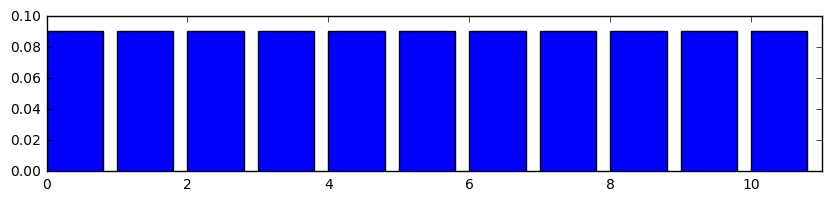

In [41]:
b.plot()

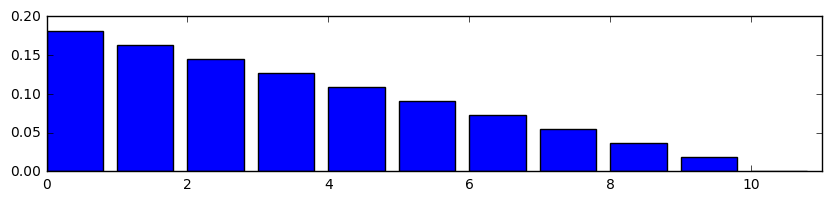

In [42]:
b.update(True); b.plot()

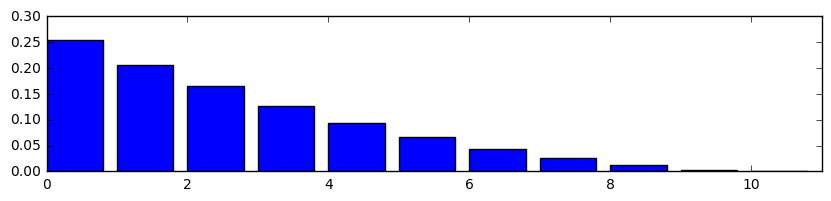

In [43]:
b.update(True); b.plot()

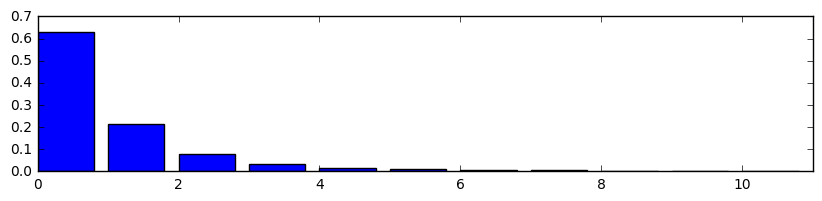

In [44]:
for x in range(10): b.update(True)
b.plot()

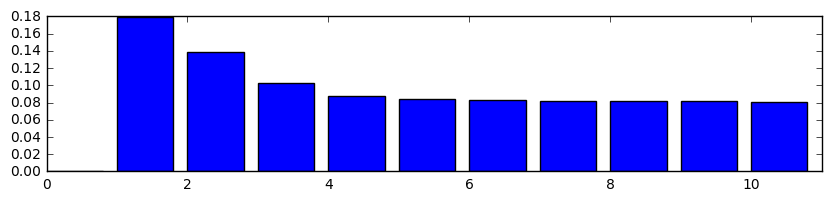

In [45]:
b.update(False); b.plot()

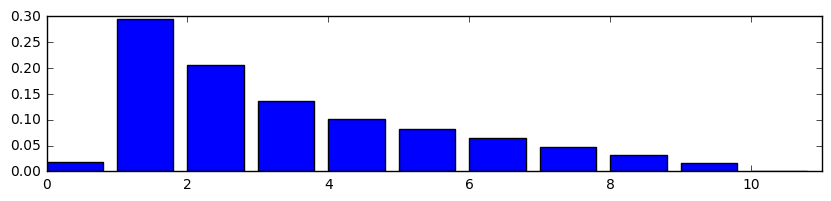

In [46]:
b.update(True); b.plot()

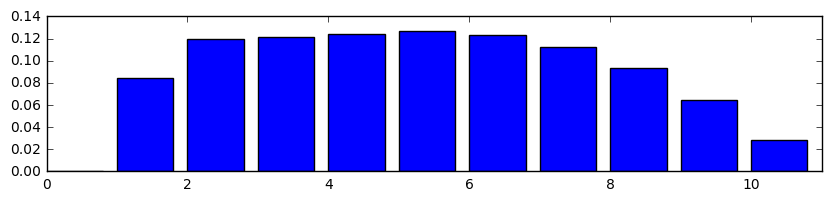

In [47]:
b.update(False); b.plot()


0.5


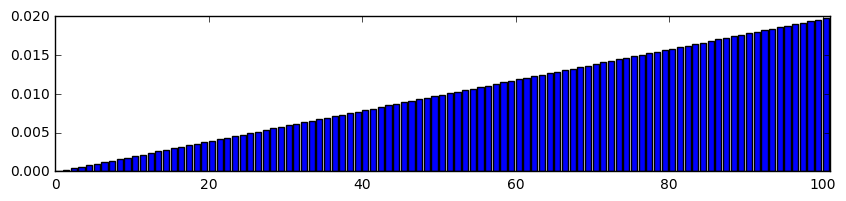


0.67


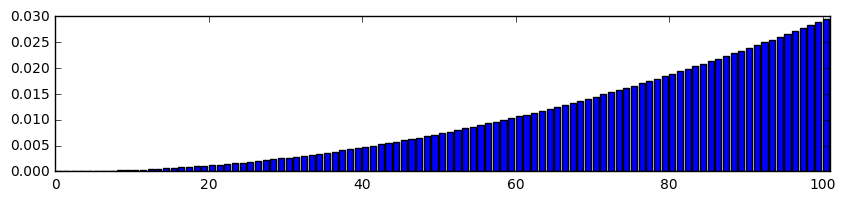


0.753104830823


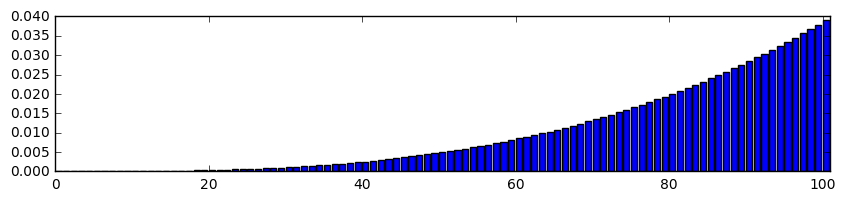


0.80274868289


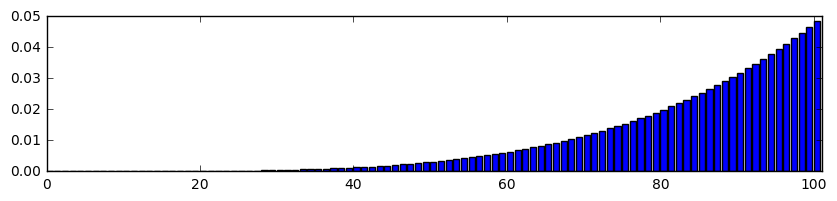


0.835748989939


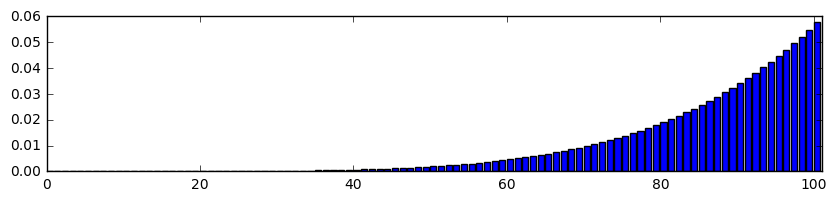


0.859274282791


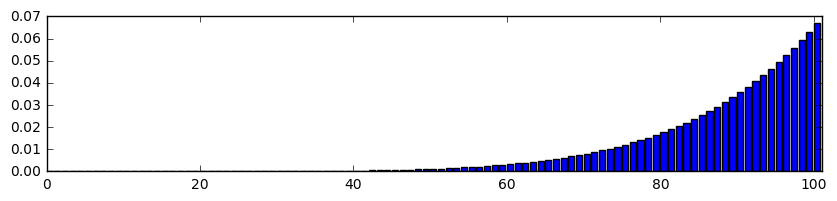


0.876893279136


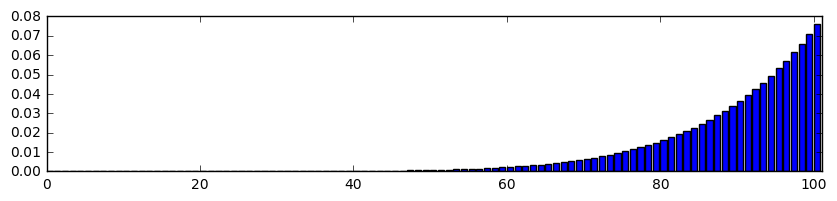


0.890582289437


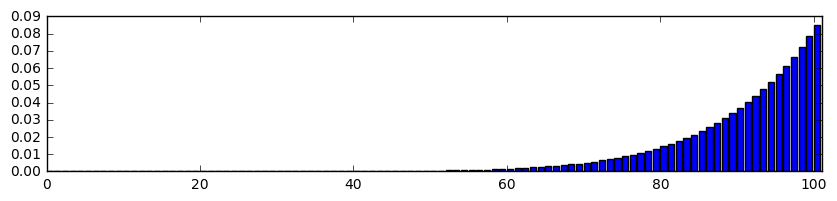


0.901524258422


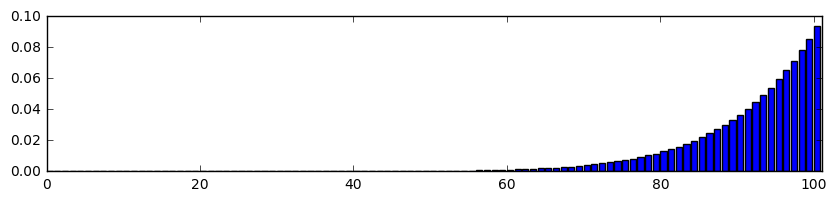

a
0.0895294209314


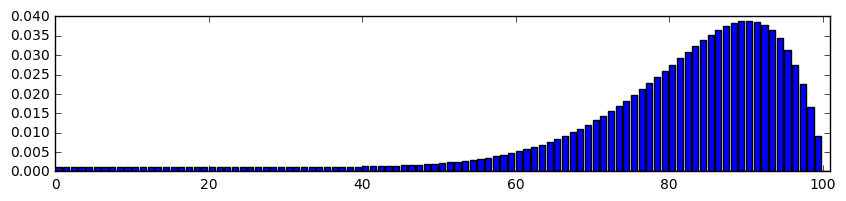

a
0.205494403481


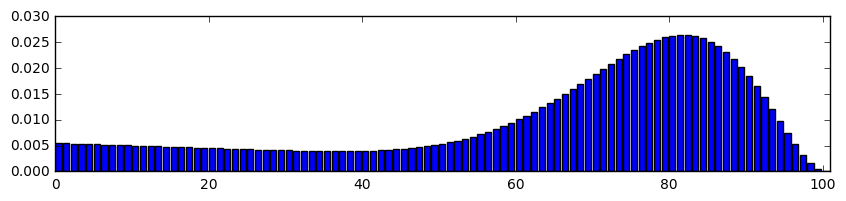

a
0.357394793313


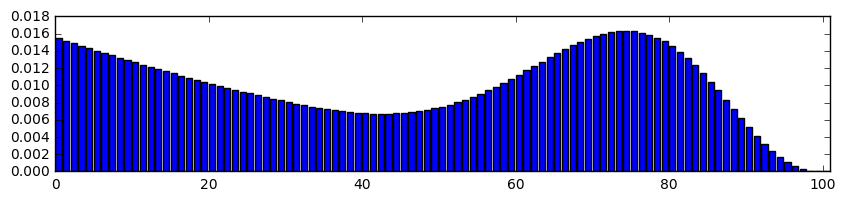

a
0.537586516283


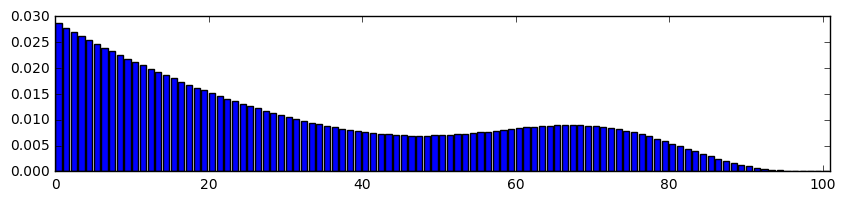


0.314084655287


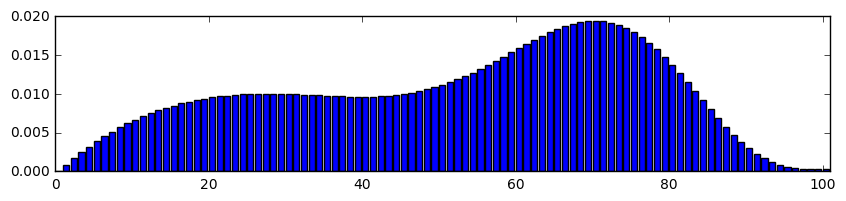

a
0.479824490447


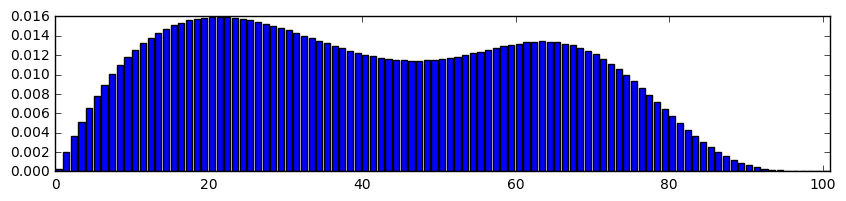

a
0.590155204022


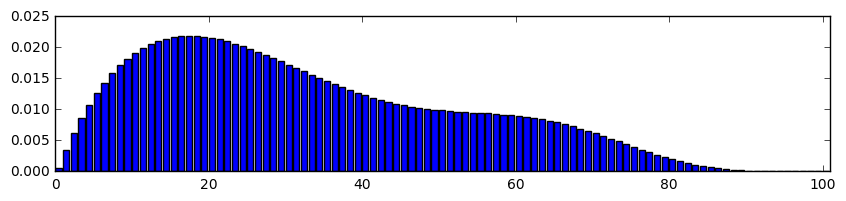


0.325700725469


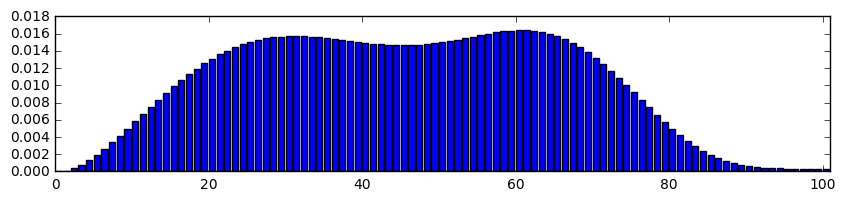

a
0.548260113668


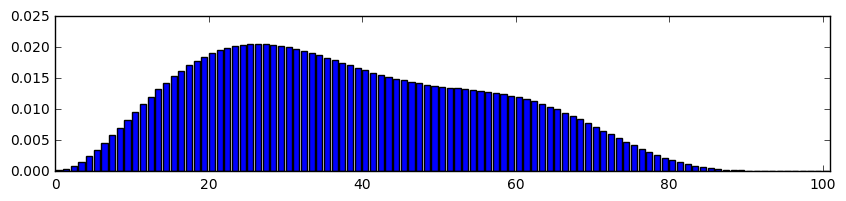


0.379190299601


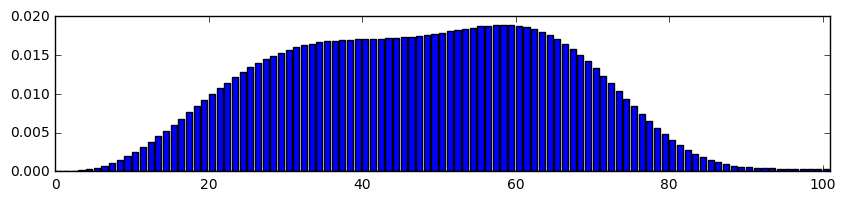


0.471992093264


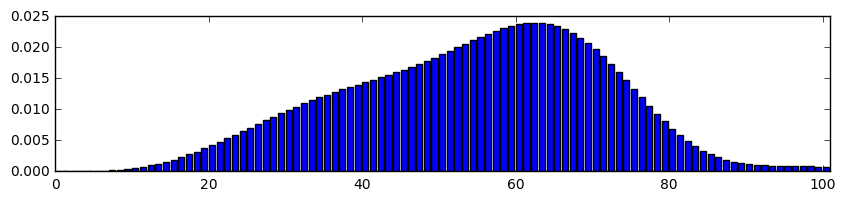

a
0.458334247306


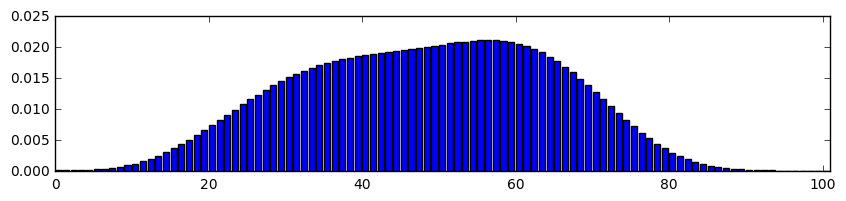


0.479374041572


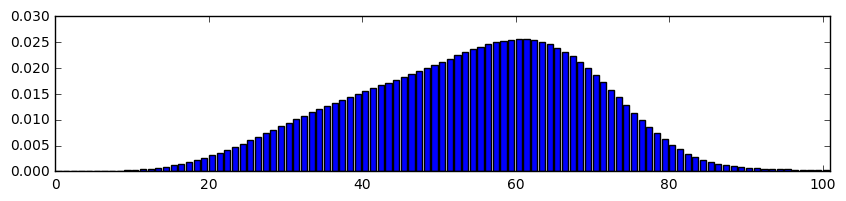


0.536948233913


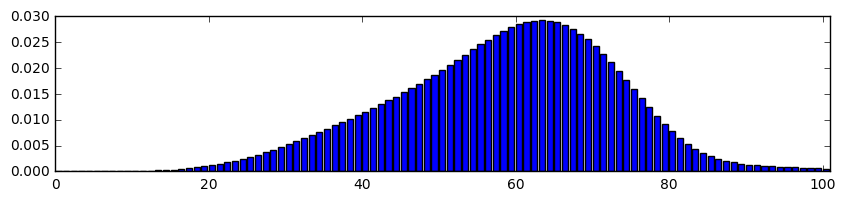

a
0.418629484882


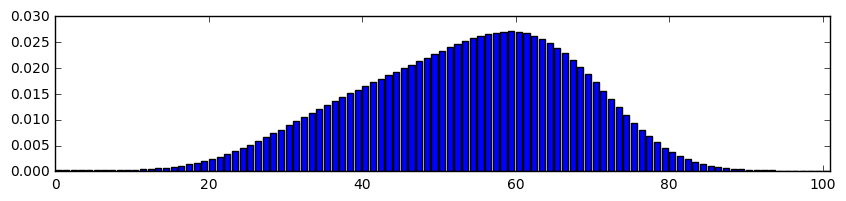


0.530271890608


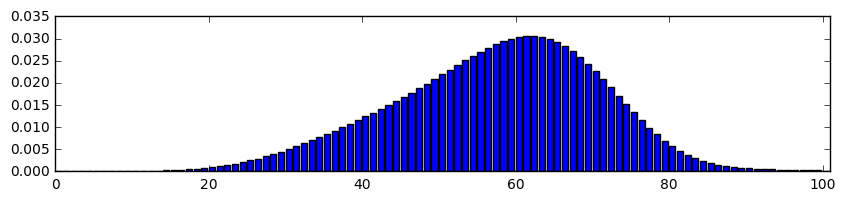

a
0.429382727865


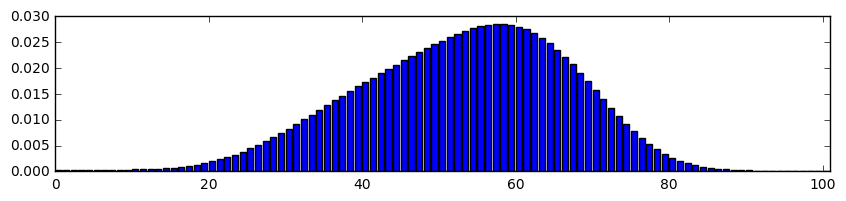

a
0.473596253523


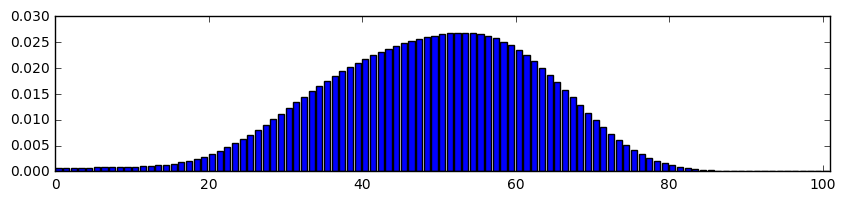

a
0.515037315921


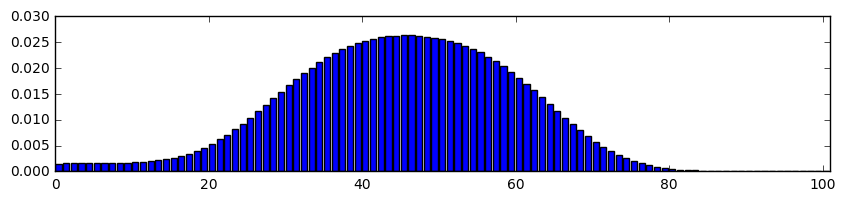

a
0.55455469354


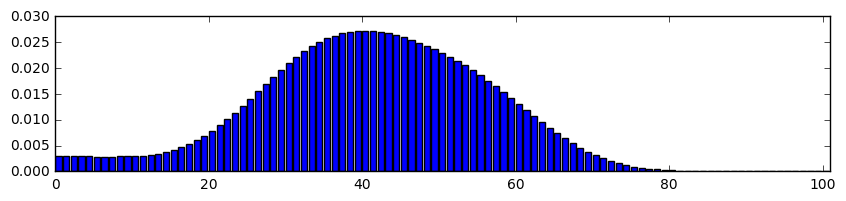


0.407818934016


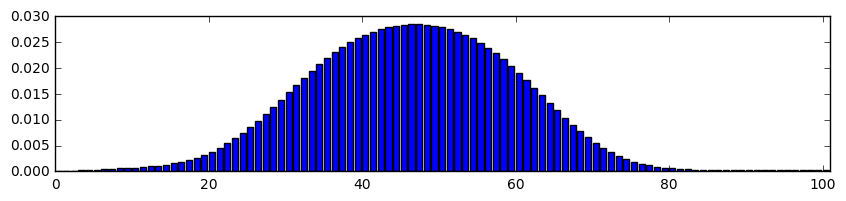

a
0.538200330968


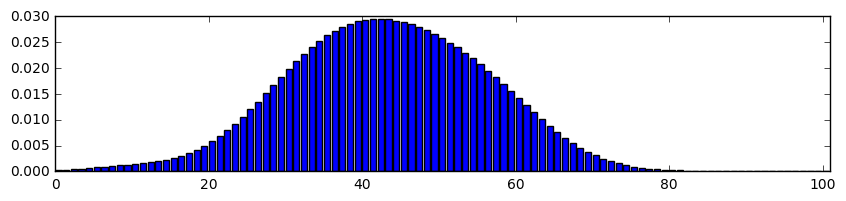


0.428353162184


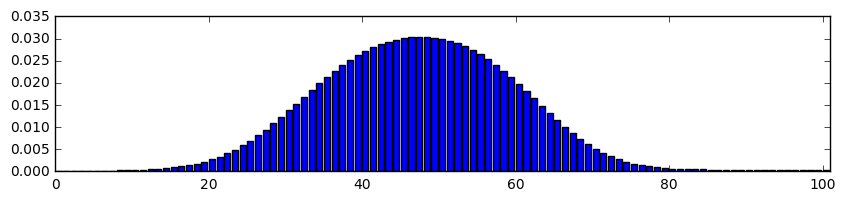


0.469730426138


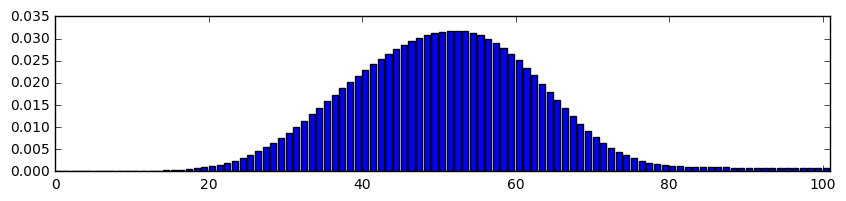


0.505254926755


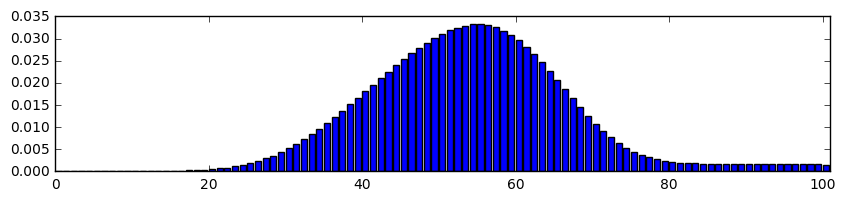


0.538374873073


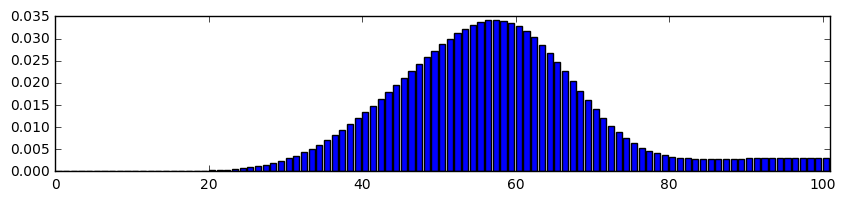

a
0.429291309613


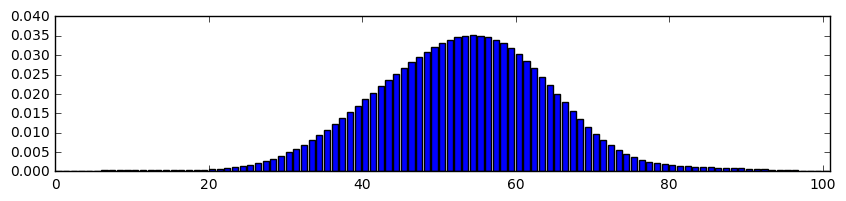

a
0.474261311489


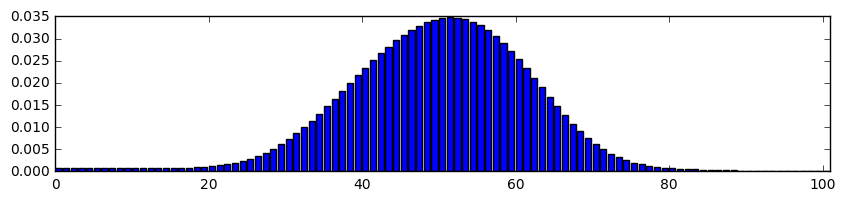

a
0.505602097597


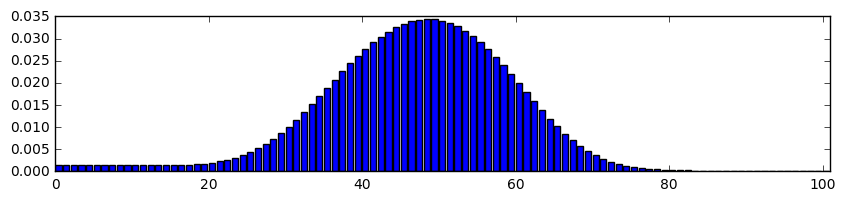

a
0.534932382549


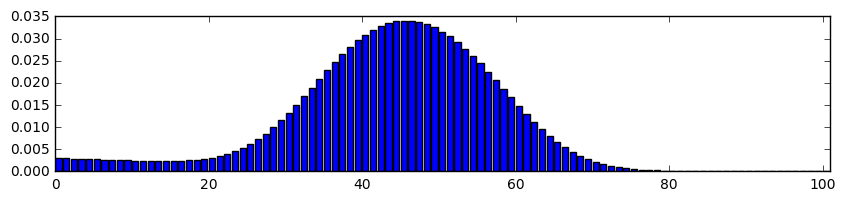

a
0.564634616101


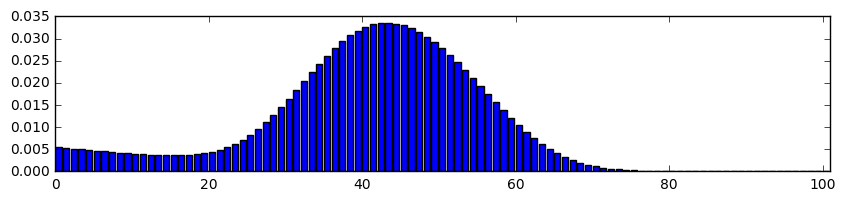

In [ ]:
b = BayesEstimator(100, 0.0001)
while True:
    a = input()
    o = a != ""
    print(b.p_observation(o))
    b.update(o)
    b.plot()
    plt.show()

In [59]:
for i in range(100):
    b.update(True)
    b.update(True)
    b.update(True)
    print(b.update(False))

0.330295719288
0.326555196073
0.323417057238
0.320629973365
0.318084619883
0.315722490618
0.31350807801
0.311417915679
0.309435494956
0.307548625181
0.305747945106
0.304026028735
0.302376820798
0.300795265691
0.299277055368
0.29781845323
0.296416168196
0.295067262831
0.293769085129
0.292519217104
0.291315435489
0.290155681352
0.289038036303
0.287960703703
0.286921993637
0.285920310801
0.284954144642
0.284022061237
0.283122696559
0.282254750818
0.281416983676
0.280608210136
0.279827296999
0.279073159752
0.278344759827
0.277641102152
0.276961232949
0.276304237721
0.275669239422
0.275055396757
0.274461902603
0.273887982532
0.273332893427
0.272795922168
0.272276384392
0.271773623309
0.271287008576
0.270815935225
0.270359822627
0.269918113508
0.269490273003
0.269075787744
0.268674164991
0.268284931789
0.267907634163
0.267541836343
0.267187120021
0.266843083629
0.266509341658
0.26618552399
0.265871275266
0.265566254277
0.265270133373
0.264982597904
0.264703345679
0.264432086446
0.26416854139

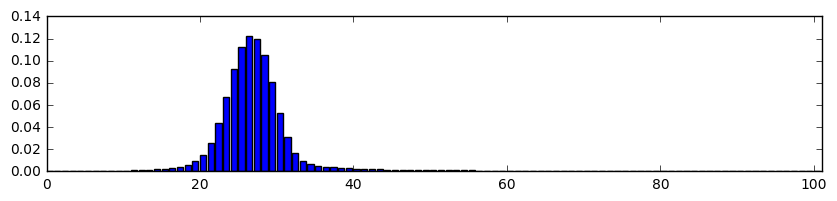

In [60]:
b.plot()